In [7]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration size we create
#pd.options.mode.chained_assignment = None


# Read in the data using Panda
df = pd.read_csv(r'C:\Users\Admin\Desktop\Project\movies.csv')




In [8]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [13]:
df.shape

(7668, 15)

In [15]:
# Clean the data
# Check if there is empty cell
print("Percentage of missing value in each columns:")
for col in df.columns:
    print(f'{col}: {np.mean(df[col].isnull()):.2f}%')
# c2:    pct_missing = np.mean(df[col].isnull())
# c2:    print("{} - {}%".format(col, pct_missing))

Percentage of missing value in each columns:
name: 0.00%
rating: 0.01%
genre: 0.00%
year: 0.00%
released: 0.00%
score: 0.00%
votes: 0.00%
director: 0.00%
writer: 0.00%
star: 0.00%
country: 0.00%
budget: 0.28%
gross: 0.02%
company: 0.00%
runtime: 0.00%


In [9]:
# Check data type
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# Top by Gross
df.sort_values(by = ["gross"], inplace = False, ascending = False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [24]:
#display all data
# pd.set_option("display.max_rows", None)

Text(0, 0.5, 'Budget Earnings')

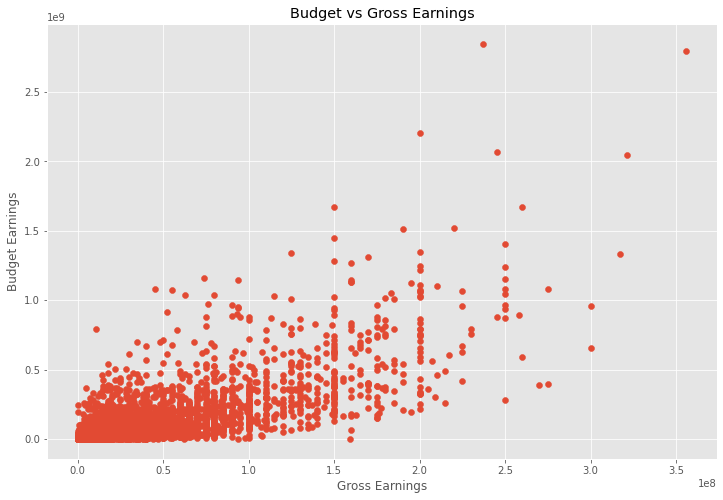

In [27]:
# Draw scatter
plt.scatter(df.budget, df.gross)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget Earnings')

<AxesSubplot:xlabel='budget', ylabel='gross'>

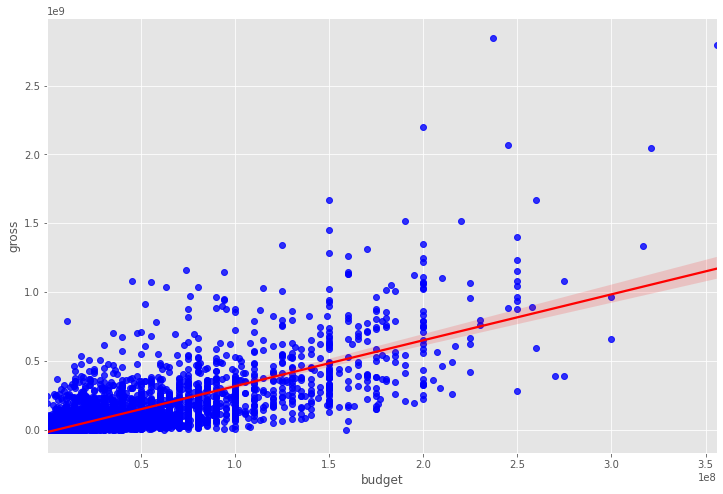

In [30]:
# Draw replot using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws = {'color':'blue'},line_kws={'color':'red'})

In [37]:
# Looking at correlation: pearson, kendall, spearman
df.corr(method ="pearson")
# High correlation between gross and budget

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


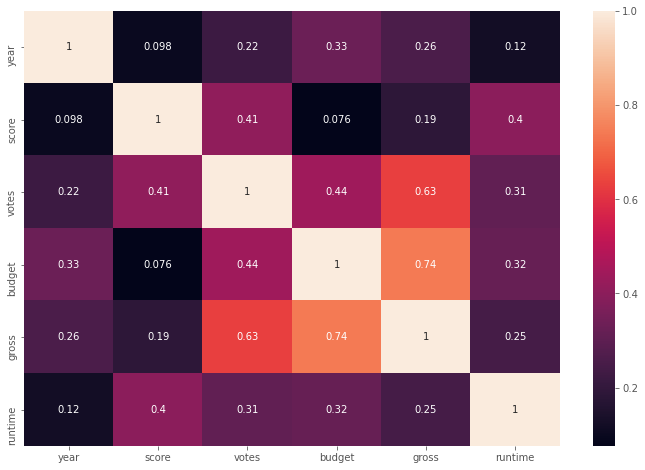

In [39]:
# corr_matrix visualization
corr_matrix = df.corr(method ="pearson")
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation matrix')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget Earnings')
plt.show()

In [10]:
# Convert categorical columns to integers
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


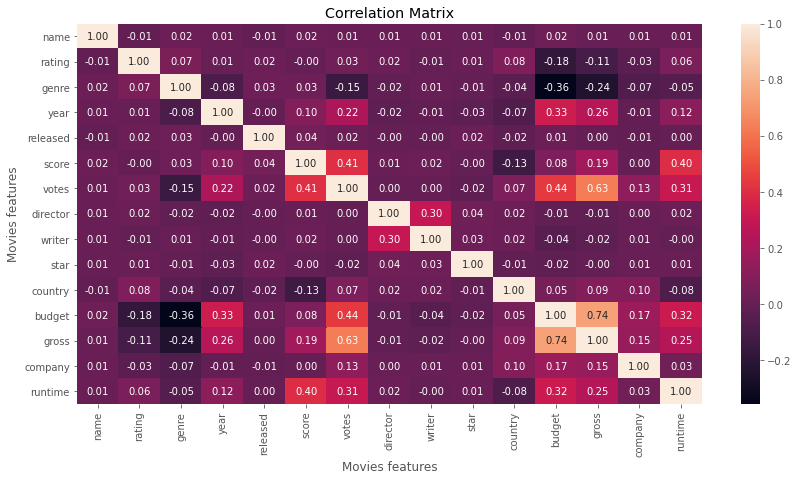

In [12]:
plt.figure(figsize=(14,7))
sns.heatmap(df_numerized.corr(method="pearson"), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.xlabel('Movies features')
plt.ylabel('Movies features')
plt.show()

In [13]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174


In [14]:
# High correlation for Gross earning
df_numerized_cors = df_numerized.corr()['gross']
df_numerized_cors

name        0.005533
rating     -0.107339
genre      -0.235650
year        0.257486
released    0.001659
score       0.186258
votes       0.630757
director   -0.014441
writer     -0.023519
star       -0.002717
country     0.092129
budget      0.740395
gross       1.000000
company     0.154840
runtime     0.245216
Name: gross, dtype: float64

In [16]:
df_numerized_cors.sort_values()

genre      -0.235650
rating     -0.107339
writer     -0.023519
director   -0.014441
star       -0.002717
released    0.001659
name        0.005533
country     0.092129
company     0.154840
score       0.186258
runtime     0.245216
year        0.257486
votes       0.630757
budget      0.740395
gross       1.000000
Name: gross, dtype: float64

In [18]:
# unstack as a whole
# df_numerized.corr().unstack

In [20]:
# Filter high corr
high_corr = df_numerized_cors[df_numerized_cors > 0.5]
high_corr

votes     0.630757
budget    0.740395
gross     1.000000
Name: gross, dtype: float64

In [ ]:
# Bugdet and gross have the highest correlation